<h3>Business Understanding<h3>

As part of the problem-solving process in the business realm, there is a general need for obtaining outcomes pertaining to specific inquiries. We will explore some key data analytics techniques that can be used to analyze Indonesian IMDb data and the insights that can be derived from them and answer the below questions:

1. Which genre of film is always the most popular every year of (2000–2020)?
2. What is the highest user's rating every year of (2000–2020)?
3. How are the impact of different actors and directors to the popularity?

Data scientists are faced with a challenge when presented with these inquiries, as they are tasked with leveraging data to uncover valuable insights that can empower business users in their decision-making process.

<h3>Data Understanding<h3>

Following the Business Understanding phase, the subsequent step is the Data Understanding phase. This critical stage builds upon the established foundation by directing attention towards the identification, collection, and analysis of relevant data sets that are instrumental in achieving the project objectives.

**Import Libraries**

> In Python, import statements are used to incorporate external libraries or modules into code, granting access to their functionalities. Please take a note for this library `from matplotlib import rcParams` imports the rcParams module, which facilitates customization of default configurations

In [2]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
%matplotlib inline


**Install Comic Style Font - Humor Sans**

You need to download and install Humor Sans font to make a comic style effect for mathlib.

In [3]:
#Load the font to the mathplotlib font manager
font_path = "Humor-Sans-1.0.ttf"
font = plt.matplotlib.font_manager.FontProperties(fname=font_path)
rcParams['font.family'] = font.get_name()

**Load Dataset**

Load the IMDb Indonesian movie's dataset into python.

In [11]:
#Load and Filter data
file = open('indonesian_movies.csv')
df = pd.read_csv(file)
df.head(5)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


**Basic Information and Describe the data**

The basic information shows the columns, non-null count and data type for each column. Next, we will change the data type for some columns, so we can process it further, such as: votes and runtime.

In [12]:
#Basic information
df.info()
#Descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


,year,users_rating
count,1272.000000,1272.000000
mean,2007.023585,6.144418
std,12.968560,1.389315
min,1926.000000,1.200000
25%,2006.000000,5.300000
50%,2011.000000,6.400000
75%,2016.000000,7.100000
max,2020.000000,9.400000


We also can see the summary statistics for numerical variables such as count, mean, median, standard deviation, minimum, and maximum values. These statistics provide an overview of the dataset and help identify any initial patterns or outliers.

<h3>Prepare Data</h3>

The aim of preparing data in the context of data science is to clean, transform, and format the data in a way that makes it suitable for analysis. Data preparation is a crucial step in the data science workflow because the quality and structure of the data directly impact the accuracy and reliability of the insights and models derived from it.

**Find the Duplicates**

Finding duplicates refers to identifying and extracting elements or values that occur more than once within a loaded Indonesian IMDb data structure. This can be useful for the next steps such as data cleaning, data validation, or identifying duplicate entries in the dataset.

In [13]:
#Find the duplicates
df.duplicated().sum()

0

0 result means there is no duplicate data in the dataset.

**Find Null Values**

Finding null or missing values in data is crucial for data cleaning, preprocessing, and analysis. Null values represent missing or undefined data points and can cause issues when performing calculations or analyses.

In [14]:
#Find null values
df.isnull().sum()

title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64

As you can see above there are several columns contain the null values such as: `description, directors, runtime, rating, genre` 

**Find the most missing columns**

In [15]:
#Find the most missing columns
most_missing_cols = set(df.columns[np.sum(df.isna())/df.shape[0] > .0])
print(most_missing_cols)

{'description', 'directors', 'runtime', 'rating', 'genre'}


There result is tally with the **Find null values** result. We need to pay attention in the next step to clean or re-format the data.

**Change Data Type**

We see the inaccurate data type for several columns as: `description, genre, rating, votes, languages, directors, actors, runtime`. But we only change the data that we only need for further process which are: `votes` and `runtime`.

In [16]:
#Change data type
df['votes'] = df['votes'].str.replace(',', '')
df['votes'] = df['votes'].astype(float)

df['runtime'] = df['runtime'].str.replace(',', '')
df['runtime'] = df['runtime'].str.replace(' min', '')

#Filter runtime with NaN values
df['runtime'] = df[df['runtime'].notna()]['runtime'].astype(float)
df['runtime'] = df[df['runtime'].notna()]['runtime']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   float64
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 109.4+ KB


**Replace Null Values**

In [54]:
#Fill missing values with 'Unknown'
df['description'] = df['description'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['directors'] = df['directors'].fillna('Unknown')
df['runtime'] = df['runtime'].fillna('Unknown')

#Check again find with numpy columns have the 'Unknown' values
set(df.columns[np.sum(df.isna())/df.shape[0] > .0])
print(df.isnull().sum())

{'directors', 'genre', 'description', 'rating', 'runtime'}
title           0
year            0
description     0
genre           0
rating          0
users_rating    0
votes           0
languages       0
directors       0
actors          0
runtime         0
dtype: int64


**Filter the Data**

We need to filter the data from 2000, we only need to start from this year since at least in the 2000s, Indonesian films experienced another growth, and it has been relatively sustainable to this day. Throughout the last two decades, this industry has been lively with film products that are very lively and exhilarating.

In [94]:
#Filter the data from year 2000
df = df.query('year >= 2000')
df.head(5)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


<h3>Question 1 : Which genre of film is always the most popular every year of (2000–2020)?</h3>

**Find the most popular genre from year 2000-2020**

Below code to find the most popular genre over year by year, which genre will be the most?

In [56]:
#Find the most popular genre in each year
grouped_by = df.groupby(["year"])['genre'].value_counts()
genre_grouped = grouped_by.groupby(level=0).head(1)

#Groupby and sum genres
all_genres_grouped = genre_grouped.groupby('genre').sum()
genres = all_genres_grouped.index


By using plt.xkcd(), create a pie data visualization using comic style (including font) that we have configured in the previous step.

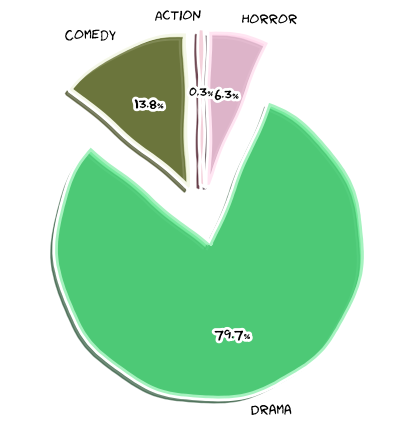

In [57]:
#Get unique genre
genre_colors = []
pie_explode = []
for i in range(len(genres)):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    a = np.round(np.clip(np.random.rand(), 0, 0.50), 1)
   
    genre_colors.append((r, g, b, a))
    pie_explode.insert(i, 0.2)

t_pie_explode = tuple(pie_explode)

with plt.xkcd():
    ax = all_genres_grouped.plot.pie(subplots=True, figsize=(5,5), colors=genre_colors, explode=t_pie_explode, autopct='%1.1f%%', shadow=True, startangle=90, fontsize=10, textprops={'fontproperties': font})
    ax[0].set_ylabel('')
        

    
   

The chart above shows the most popular genre from year 2000-2020. The most popular genre is Drama, followed by Comedy, Action, and Horror. Some title movies such as : Pasir Berbisik (2001), Ca Bau Kan (2002), Anak Garuda (2020), Si Doel the Movie 3 (2020) etc. are Drama genre.

<h3>Question 2: What is the highest user's rating every year of (2000–2020)?</h3>

Get the most popular genre each year, by visualizing it in a timeline style.

**Find the most popular genre from year 2000-2020**

Below code to find the most popular genre over year by year, which genre will be the most?

/var/folders/7r/ytdn87mn3_l68t3smjt2_5p40000gn/T/ipykernel_80454/2571334777.py:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(list_x, levels, use_line_collection=True)


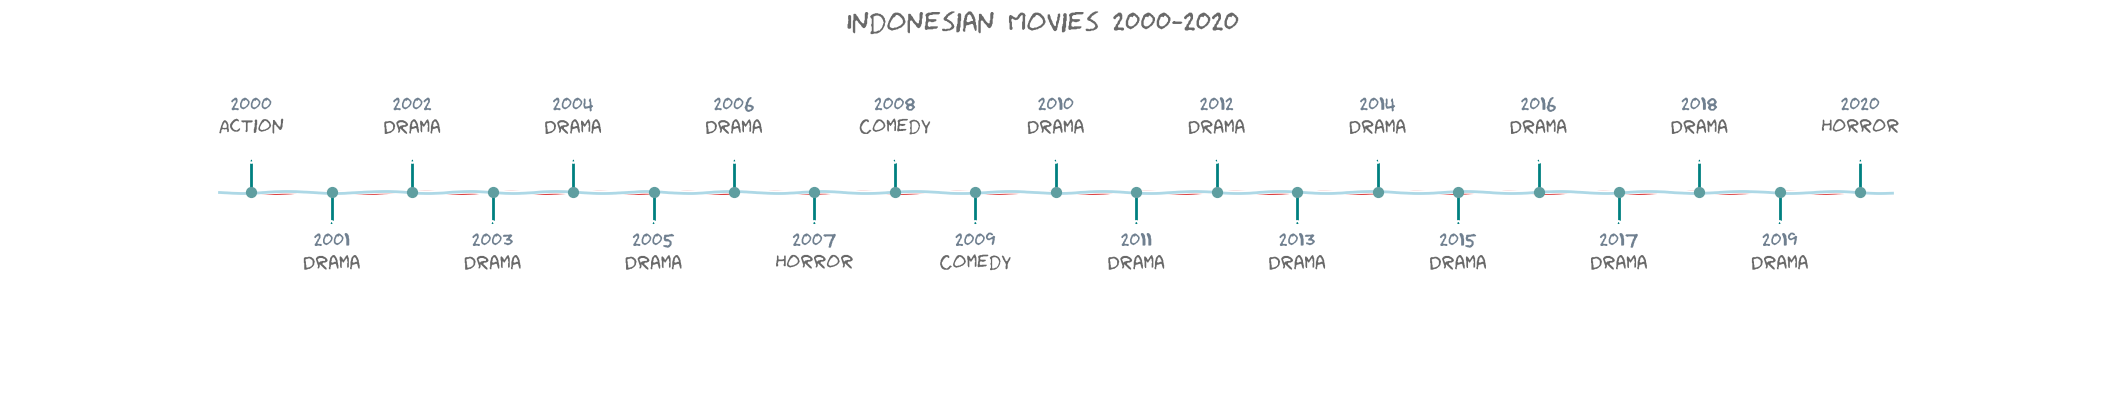

In [58]:
group_by_year = df.groupby(by=['year'])
list_years = list(group_by_year.groups.keys())
list_x = []
for x in range(len(list_years)):
    list_x.append(x+1)

list_text = []
grouped_by = df.groupby(["year"])['genre'].value_counts()
genre_grouped = grouped_by.groupby(level=0).head(1)
for i in range(len(genre_grouped)):
    list_text.append(genre_grouped.index[i][1])


with plt.xkcd():
    fig, ax = plt.subplots(figsize=(len(list_years), 4), constrained_layout=True)
    ax.set_ylim(-2, 1.75)
    ax.set_xlim(-2, len(list_years)+3)

    # Timeline : line
    ax.axhline(0, xmin=0.1, xmax=0.9, c='lightblue', zorder=1)

    # Timeline : Time Points
    ax.scatter(list_x, np.zeros(len(list_x)), s=50, c='cadetblue',zorder=4)

    # Stemplot : vertical line
    levels = np.zeros(len(list_x))
    levels[::2] = 0.3
    levels[1::2] = -0.3
    markerline, stemline, baseline = ax.stem(list_x, levels, use_line_collection=True)
    plt.setp(baseline, zorder=0)
    plt.setp(markerline, marker=',', color='teal')
    plt.setp(stemline, color='teal')

    # Text
    for idx, x, time, txt in zip(range(1, len(list_x)+1), list_x, list_years, list_text):
        ax.text(x, 1.3*(idx%2)-0.5, time, ha='center',
                fontproperties=font, fontweight='bold',
                color='slategrey', fontsize=14)

        ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
            fontproperties=font,fontsize=14, color='dimgrey')
    # Spine
    for spine in ["left", "top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    # Ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Title
    ax.text(len(list_x)/2.5,1.57,"Indonesian Movies 2000-2020", fontproperties=font, fontsize=20, color='dimgray')

    plt.show()


The genre and year are plotted and tied to the timeline perfectly.

**Find the Maximum User's Rating with Gender in Each Year**

So, how about which gender would be the maximum’s user’s rating? Let’s dive deep to the following steps. Still, by using the plt.xkcd() to visualize the data, we will plot it in a horizontal bar.

<Figure size 400x1200 with 0 Axes>

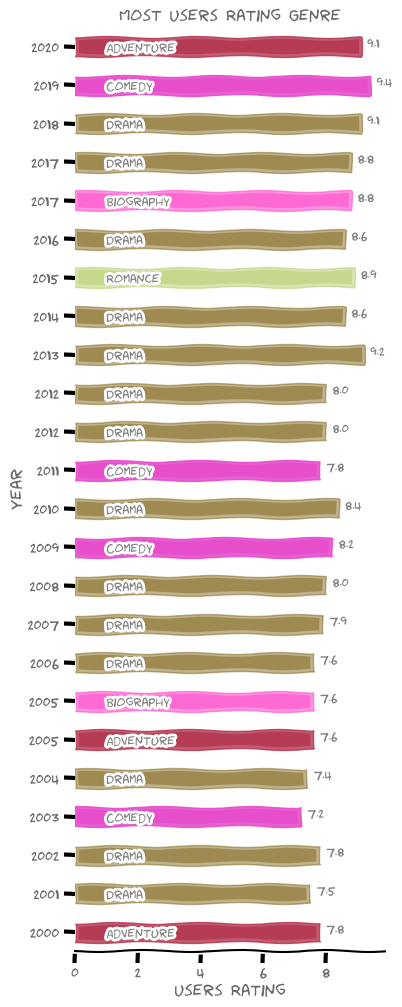

In [32]:
#Find the maximum users rating with gender in each year
max_rating = df[df['users_rating'] == df.groupby('year')['users_rating'].transform('max')].sort_values(by='year')
max_rating = max_rating[['year', 'genre', 'users_rating']].set_index('year')
genres = max_rating['genre'].to_list()

#Get unique genre
genre_color = {}
genres_unique = list(set(genres))
for i in range(len(genres_unique)):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    a = np.round(np.clip(np.random.rand(), 0, 0.90), 1)
    genre_color.update({genres_unique[i]:(r, g, b, a)})

with plt.xkcd():
    plt.rcParams['figure.figsize'] = [4, 12]
    
    # This figure will be in XKCD-style
    fig1 = plt.figure()

    ax = max_rating.plot.barh()
    
    i = 0
    for p in ax.patches:
        #Match color from genre_color, if not found, generate new color
        color = genre_color[genres[i]] if genres[i] in genre_color else 'dimgray'
        
        #Set annotation of each bar by its value (concat with genre)
        ax.annotate(f"{p.get_width()}", (p.get_width() + 0.20, i), fontproperties=font, fontsize=9, color='gray')

        ax.annotate(f"{genres[i]}", (1, i - 0.1), fontproperties=font, fontsize=9, color='gray')
        
        #Set color of each bar
        p.set_color(color)
        i += 1    

    #Set legend to invisible
    ax.legend().set_visible(False)

    #Set font of users rating value 
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
        label.set_fontsize(10)
        label.set_color('dimgray')

    #Set font of year value 
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
        label.set_fontsize(10)
        label.set_color('dimgray')

    #Spine
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.set_ylabel('Year', fontproperties=font, fontsize=12, color='dimgray')
    ax.set_xlabel('Users Rating', fontproperties=font, fontsize=12, color='dimgray')
    ax.set_title('Most Users Rating Genre', fontproperties=font, fontsize=12, color='dimgray')
    

As we can see in the above image, genre of maximum user’s rating are DRAMA, means Indonesia people love DRAMA at the most.

<h3>Question 3: How are the impact of different actors and directors to the popularity?</h3>

Let’s take another data breakdown to check how is the impact of different actors and directors on the popularity. First step to get the top actors, and find the relationship between most popular genres we have found above and actors who play in those popular genres.

In [61]:
#Breakdown the top actors
top_actors = df['actors'].str.split(', ', expand=True).stack().value_counts()
top_actors = top_actors[top_actors < 250]
top_actors = top_actors.head(100)
top_actors = top_actors.sort_values(ascending=False)
top_actors.head(20)

'Lukman Sardi'          52
'Jajang C. Noer'        39
'Verdi Solaiman'        38
'Dwi Sasono'            34
'Tio Pakusadewo'        33
'Surya Saputra'         32
'Ence Bagus'            30
'Reza Rahadian'         29
'Ray Sahetapy'          28
'Slamet Rahardjo'       27
'Henky Solaiman'        27
'T. Rifnu Wikana'       26
'Wulan Guritno'         26
'Ira Wibowo'            25
'Joe Project P.'        25
'Mathias Muchus'        24
'Ringgo Agus Rahman'    23
'Nino Fernandez'        22
'Yayu A.W. Unru'        22
'Indra Birowo'          22
Name: count, dtype: int64

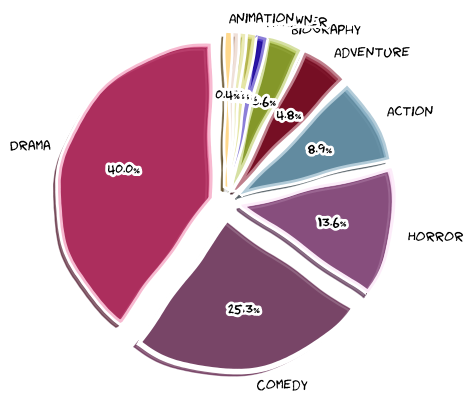

In [63]:
def count_top_actors(row):
    """
    A function to count the top actors

    Parameters:
    row (Series): Input of a Dataframe series 

    Returns:
    int: Return the count of actors which are included in the top actors variable
    """
    count = 0
    for actor in row['actors'].split(', '):
        if actor in top_actors.index:
            count += 1

    return count        
        
#Find the relationship between most popular genre and actors
df['top_actors_count'] = df.apply(count_top_actors, axis=1)

df_popular_actors = df[df['top_actors_count'] > 0].groupby('genre')['top_actors_count'].count().sort_values(ascending=False)
df_not_popular_actors = df[df['top_actors_count'] == 0].groupby('genre')['genre'].count().sort_values(ascending=False)

#Groupby and sum genres
all_genres_grouped = df_popular_actors.groupby('genre').sum()
genres = all_genres_grouped.index

#Get unique genre
genre_colors = []
pie_explode = []

for i in range(len(genres)):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    a = np.round(np.clip(np.random.rand(), 0, 0.50), 1)
    
    genre_colors.append((r, g, b, a))
    pie_explode.insert(i, 0.1)

t_pie_explode = tuple(pie_explode)

with plt.xkcd():
    ax = df_popular_actors.plot.pie(subplots=True, figsize=(5,5), colors=genre_colors, explode=t_pie_explode, autopct='%1.1f%%', shadow=True, startangle=90, fontsize=10, textprops={'fontproperties': font})
    ax[0].set_ylabel('')
        

Drama has the most top actors play in the movie, it is about 40% top actors play in the Drama genre, followed by Comedy (25.3%) and Horror (13.6%).

Last step, get the top directors and see how is the impact to the most popular genres. We count how many movies for each director involved in it and sort the 100 highest number.

In [65]:
#Breakdown the top directors
top_directors = df['directors'].str.split(', ', expand=True).stack().value_counts()
top_directors = top_directors.sort_values(ascending=False)
top_directors = top_directors.head(100)
top_directors

Nayato Fio Nuala     61
Rizal Mantovani      34
Hanung Bramantyo     31
Monty Tiwa           23
Rudy Soedjarwo       21
                     ..
Raymond Handaya       2
Adriyanto Dewo        2
Jastis Arimba         2
Slamet Rahardjo       2
B.W. Purba Negara     2
Name: count, Length: 100, dtype: int64

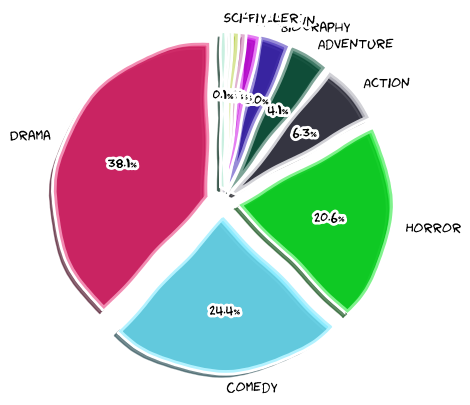

In [34]:
#Find the relationship between most popular genre and director
df['top_directors_count'] = df['directors'].apply(lambda x: 1 if x in top_directors.index else 0)

df_popular_directors = df[df['top_directors_count'] > 0].groupby('genre')['top_directors_count'].count().sort_values(ascending=False)
df_not_popular_directors = df[df['top_directors_count'] == 0].groupby('genre')['genre'].count().sort_values(ascending=False)

#Groupby and sum genres
all_genres_grouped = df_popular_directors.groupby('genre').sum()
genres = all_genres_grouped.index

#Get unique genre
genre_colors = []
pie_explode = []

for i in range(len(genres)):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    a = np.round(np.clip(np.random.rand(), 0, 0.50), 1)
    
    genre_colors.append((r, g, b, a))
    pie_explode.insert(i, 0.1)

t_pie_explode = tuple(pie_explode)

with plt.xkcd():
    ax = df_popular_directors.plot.pie(subplots=True, figsize=(5,5), colors=genre_colors, explode=t_pie_explode, autopct='%1.1f%%', shadow=True, startangle=90, fontsize=10, textprops={'fontproperties': font})
    ax[0].set_ylabel('')
        

Drama still becomes the most top directors in the movie, it is about 38.1% top directors in the Drama genre, followed by Comedy (24.4%) and Horror (20.6%)